[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

#  Random Forests

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 08/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0054EnsembleRandomForests.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [4]:
# Courses Packages


In [5]:
# General Auxiliary Functions


## Random Forests Classification

In this note book we'll use the Random Forests based classifier in the task of estimating whether a passenger on the Titanic will or will not survive.  
We'll focus on basic pre processing of the data and analyzing the importance of features using the classifier.

* <font color='brown'>(**#**)</font> This is a very popular data set for classification. You may have a look for notebooks on the need with a deeper analysis of the data set itself.

In [6]:
# Parameters

# Data
trainRatio = 0.75

# Model
numEst = 150
spliCrit = 'gini'
maxLeafNodes = 20
outBagScore = True

# Feature Permutation
numRepeats = 50


## Generate / Load Data


In [7]:
# Load Data

dfX, dsY = fetch_openml('titanic', version = 1, return_X_y = True, as_frame = True, parser = 'auto')

print(f'The features data shape: {dfX.shape}')
print(f'The labels data shape: {dsY.shape}')

The features data shape: (1309, 13)
The labels data shape: (1309,)


### Plot Data

In [8]:
# Plot the Data

# The Data Frame of Features
dfX.head(10)


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


* <font color='red'>(**?**)</font> What kind of a feature is `name`? Should it be used?
* <font color='red'>(**?**)</font> What kind of a feature is `ticket`? Should it be used?

## Pre Processing and EDA

In [9]:
# Dropping Features
# Dropping the `name` and `ticket` features (Avoid 1:1 identification)

dfX = dfX.drop(columns = ['name', 'ticket'])

* <font color='brown'>(**#**)</font> Pay attention that we dropped the features, but a deeper analysis could extract information from them (Type of ticket, families, etc...). 

In [10]:
# The Features Data Frame
dfX.head(10)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1,female,29.0000,0,0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,male,0.9167,1,2,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,female,2.0000,1,2,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,male,30.0000,1,2,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,female,25.0000,1,2,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,male,48.0000,0,0,26.5500,E12,S,3,NaN,"New York, NY"
6,1,female,63.0000,1,0,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,male,39.0000,0,0,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,female,53.0000,2,0,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,male,71.0000,0,0,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [11]:
# The Labels Data Series
dsY.head(10)

0    1
1    1
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [12]:
# Merging Data
dfData = pd.concat([dfX, dsY], axis = 1)

In [13]:
# Data Frame Info
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   sex        1309 non-null   category
 2   age        1046 non-null   float64 
 3   sibsp      1309 non-null   int64   
 4   parch      1309 non-null   int64   
 5   fare       1308 non-null   float64 
 6   cabin      295 non-null    object  
 7   embarked   1307 non-null   category
 8   boat       486 non-null    object  
 9   body       121 non-null    float64 
 10  home.dest  745 non-null    object  
 11  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(3)
memory usage: 96.4+ KB


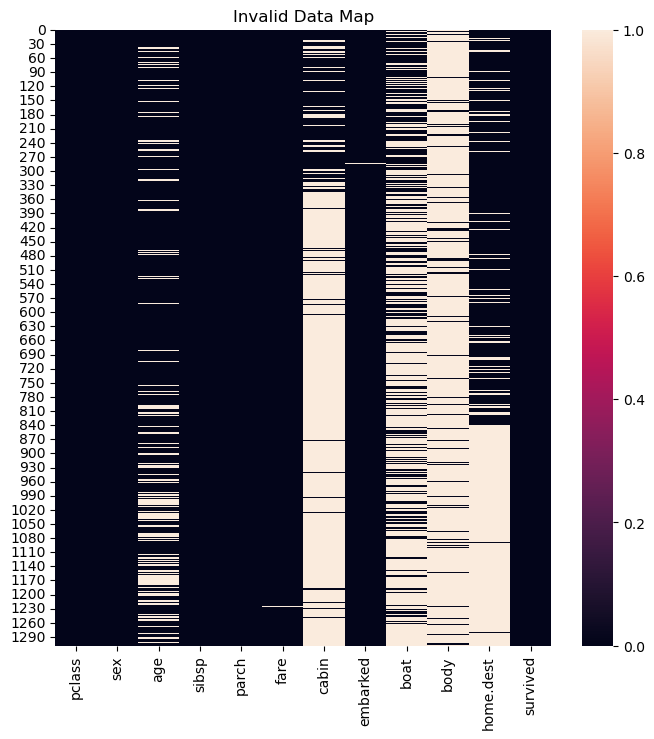

In [14]:
# Missing / Invalid Values
# Null / NA / NaN Matrix

#===========================Fill This===========================#
# 1. Calculate the logical map of invalid values using the method `isna()`.
mInvData = dfData.isna() #<! The logical matrix of invalid values
#===============================================================#

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
sns.heatmap(data = mInvData, square = False, ax = hA)
hA.set_title('Invalid Data Map')

plt.show()

Since the features `cabin`, `boat`, `body` and `home.dest` have mostly non valid values the will be dropped as well.

* <font color='brown'>(**#**)</font> Some implementation of Ensemble Trees can handle missing values. They might benefit in such case asl well.

In [15]:
# Features Filtering
# Removing Features with Invalid Values.

dfData = dfData.drop(columns = ['cabin', 'boat', 'body', 'home.dest'])

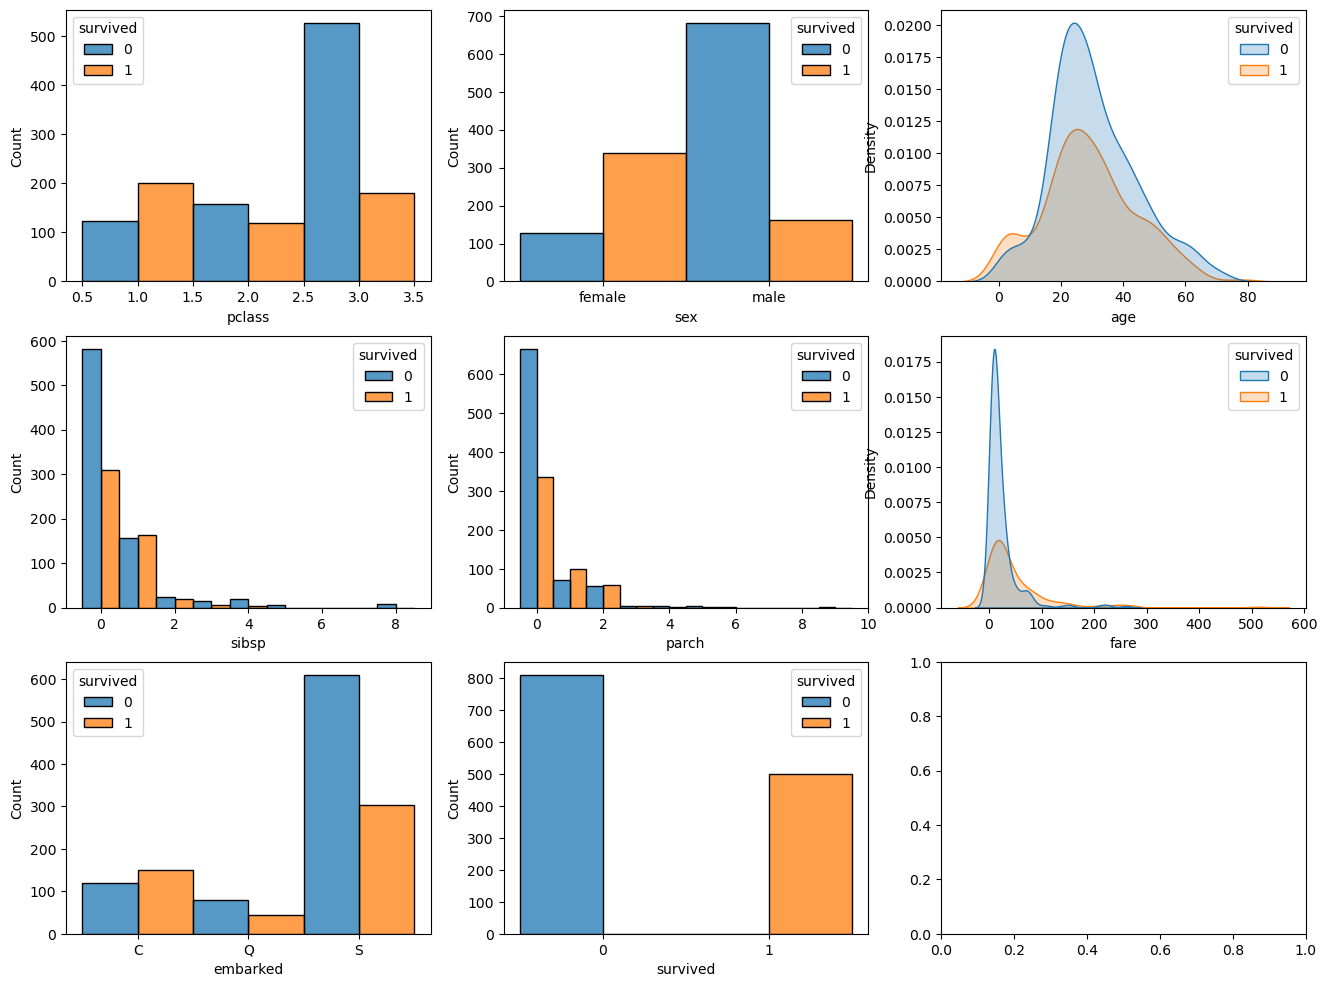

In [16]:
# Data Visualization
# Basic EDA on the Data

numCol = dfData.shape[1]
lCols  = dfData.columns
numAx  = int(np.ceil(np.sqrt(numCol)))

# hIsCatLikData = lambda dsX: (pd.api.types.is_categorical_dtype(dsX) or pd.api.types.is_bool_dtype(dsX) or pd.api.types.is_object_dtype(dsX) or pd.api.types.is_integer_dtype(dsX)) #<! Deprecated
hIsCatLikData = lambda dsX: (isinstance(dsX.dtype, pd.CategoricalDtype) or pd.api.types.is_bool_dtype(dsX) or pd.api.types.is_object_dtype(dsX) or pd.api.types.is_integer_dtype(dsX))

hF, hAs = plt.subplots(nrows = numAx, ncols = numAx, figsize = (16, 12))
hAs = hAs.flat

for ii in range(numCol):
    colName = dfData.columns[ii]
    if hIsCatLikData(dfData[colName]):
        sns.histplot(data = dfData, x = colName, hue = 'survived', stat = 'count', discrete = True, common_norm = True, multiple = 'dodge', ax = hAs[ii])
    else:
        sns.kdeplot(data = dfData, x = colName, hue = 'survived', fill = True, common_norm = True, ax = hAs[ii])

plt.show()

* <font color='red'>(**?**)</font> Have a look on the features and try to estimate their importance for the estimation.

### Filling Missing Data

For the rest of the missing values we'll use a simple method of interpolation:

 - Categorical Data: Using the mode value.
 - Numeric Data: Using the median / mean.

* <font color='brown'>(**#**)</font> We could employ much more delicate and sophisticated data.  
For instance, use the mean value of the same `pclass`. Namely profiling the data by other features to interpolate the missing feature.
* <font color='brown'>(**#**)</font> Data imputing can be done by using a model as well: Regression for _continuous_ data, Classification for _categorical_ data.
* <font color='brown'>(**#**)</font> The relevant classed in SciKti Learn: [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html), [`IterativeImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html), [`KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html).

In [17]:
# Missing Value by Dictionary
dNaNs = {'embarked': dfData['embarked'].mode()[0], 'age': dfData['age'].median(), 'fare': dfData['fare'].median()}

dfData = dfData.fillna(value = dNaNs, inplace = False) #<! We can use the `inplace` for efficiency

* <font color='brown'>(**#**)</font> The above is equivalent of using [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html).

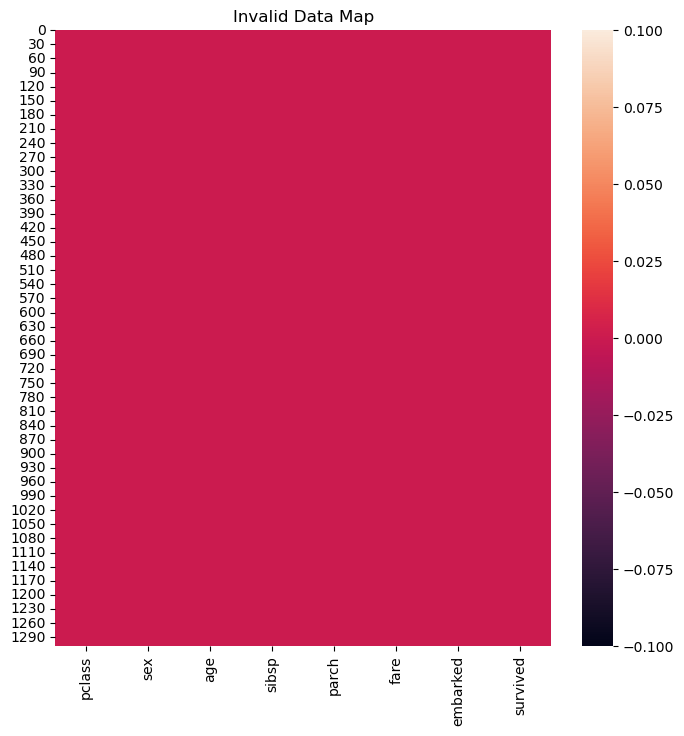

In [18]:
# Null / NA / NaN Matrix

mInvData = dfData.isna() #<! The logical matrix of invalid values

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
sns.heatmap(data = mInvData, square = False, ax = hA)
hA.set_title('Invalid Data Map')

plt.show()

### Conversion of Categorical Data

In this notebook we'll use the [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) implementation of Random Forests.  
At the moment, it doesn't support Categorical Data, hence we'll use Dummy Variables (One Hot Encoding).

* <font color='brown'>(**#**)</font> Pay attention that one hot encoding is an inferior approach to having a real support for categorical data.
* <font color='brown'>(**#**)</font> For 2 values categorical data (Binary feature) there is no need fo any special support.
* <font color='brown'>(**#**)</font> Currently, the implementation of [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) doesn't support categorical values which are not ordinal (As it treats them as numeric). Hence we must use `OneHotEncoder`.  
See status at https://github.com/scikit-learn/scikit-learn/pull/12866.
* <font color='brown'>(**#**)</font> The _One Hot Encoding_ is not perfect. See [Are Categorical Variables Getting Lost in Your Random Forests](https://web.archive.org/web/20200307172925/https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/) (Also [Notebook - Are Categorical Variables Getting Lost in Your Random Forests](https://notebook.community/roaminsight/roamresearch/BlogPosts/Categorical_variables_in_tree_models/categorical_variables_post)). 

In [19]:
# Features Encoding
# 1. The feature 'embarked' -> One Hot Encoding.
# 1. The feature 'sex' -> Mapping (Female -> 0, Male -> 1).
dfData = pd.get_dummies(dfData, columns = ['embarked'], drop_first = False)
dfData['sex'] = dfData['sex'].map({'female': 0, 'male': 1})

In [20]:
# Convert Data Type
dfData = dfData.astype(dtype = {'pclass': np.uint8, 'sex': np.uint8, 'sibsp': np.uint8, 'parch': np.uint8, 'survived': np.uint8})

In [21]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   uint8  
 1   sex         1309 non-null   uint8  
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   uint8  
 4   parch       1309 non-null   uint8  
 5   fare        1309 non-null   float64
 6   survived    1309 non-null   uint8  
 7   embarked_C  1309 non-null   bool   
 8   embarked_Q  1309 non-null   bool   
 9   embarked_S  1309 non-null   bool   
dtypes: bool(3), float64(2), uint8(5)
memory usage: 30.8 KB


## Train the Random Forests Model

The random forests models basically creates weak classifiers by limiting their access to the data and features.  
This basically also limits their correlation which means we can use their mean in order to reduce the variance of the estimation.

### Split Train & Test

In [22]:
# Split to Features and Labels

dfX = dfData.drop(columns = ['survived'])
dsY = dfData['survived']

print(f'The features data shape: {dfX.shape}')
print(f'The labels data shape: {dsY.shape}')

The features data shape: (1309, 9)
The labels data shape: (1309,)


In [23]:
# Split the Data

dfXTrain, dfXTest, dsYTrain, dsYTest = train_test_split(dfX, dsY, train_size = trainRatio, random_state = seedNum, shuffle = True, stratify = dsY)


### Train the Model

In [24]:
# Construct the Model & Train

oRndForestsCls = RandomForestClassifier(n_estimators = numEst, criterion = spliCrit, max_leaf_nodes = maxLeafNodes, oob_score = outBagScore)
oRndForestsCls = oRndForestsCls.fit(dfXTrain, dsYTrain)

In [25]:
# Scores of the Model

print(f'The train accuracy     : {oRndForestsCls.score(dfXTrain, dsYTrain):0.2%}')
print(f'The out of bag accuracy: {oRndForestsCls.oob_score_:0.2%}')
print(f'The test accuracy      : {oRndForestsCls.score(dfXTest, dsYTest):0.2%}')

The train accuracy     : 86.03%
The out of bag accuracy: 83.18%
The test accuracy      : 75.30%


* <font color='blue'>(**!**)</font> Try different values for the model's hyper parameter (Try defaults as well).

## Feature Importance Analysis

### Contribution to Impurity Decrease

This is the default method for feature importance of decision trees based methods.  
It basically sums the amount of impurity reduced by splits by each feature.

In [26]:
# Extract Feature Importance
vFeatImp = oRndForestsCls.feature_importances_
vIdxSort = np.argsort(vFeatImp)


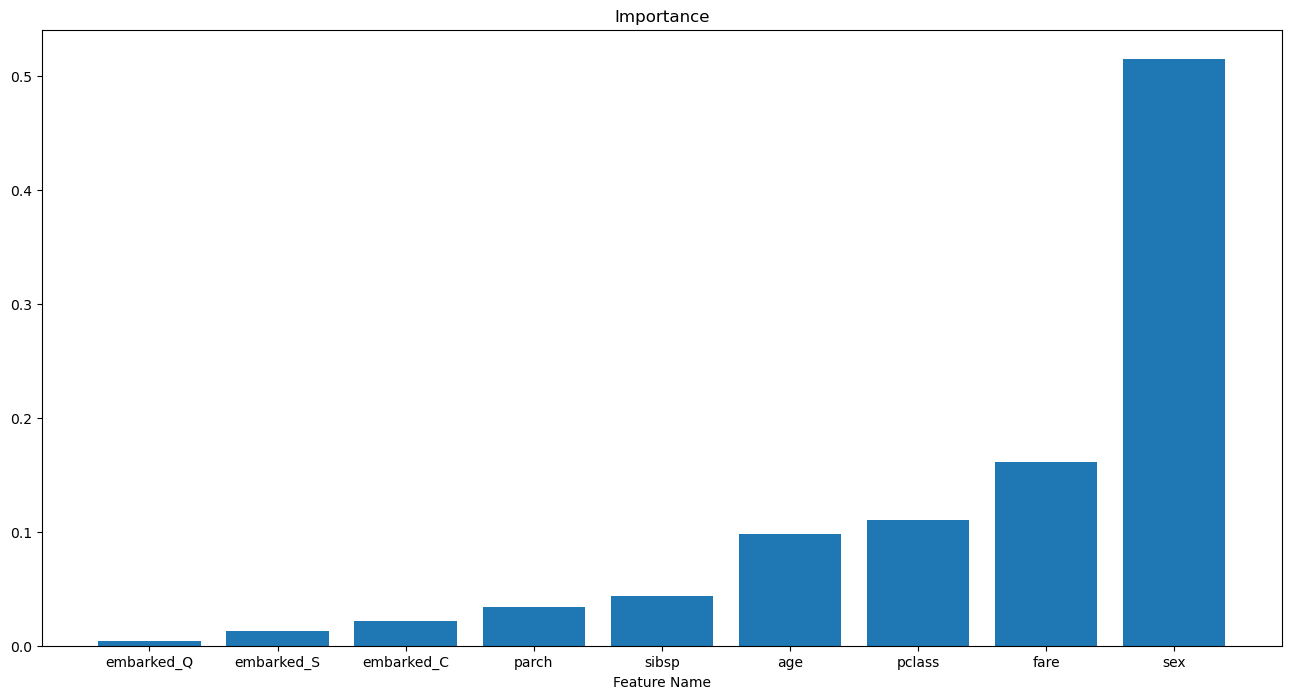

In [27]:
# Display Feature Importance
hF, hA = plt.subplots(figsize = (16, 8))
hA.bar(x = dfXTrain.columns[vIdxSort], height = vFeatImp[vIdxSort])
hA.set_title('Features Importance of the Model')
hA.set_xlabel('Feature Name')
hA.set_title('Importance')

plt.show()

* <font color='red'>(**?**)</font> Do we need all 3: `embarked_C`, `embarked_Q` and `embarked_S`? Look at the options of `get_dummies()`.

### Permutation Effect

This is a more general method to measure the importance of a feature.  
We basically replace the values with "noise" to see how much performance has been deteriorated.

* <font color='brown'>(**#**)</font> The SciKit Learn's function which automates the process is [`permutation_importance()`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html).
* <font color='brown'>(**#**)</font> This is highly time consuming operation. Hence the speed of decision trees based methods creates a synergy.
* <font color='brown'>(**#**)</font> The importance is strongly linked to the estimator in use.

In [28]:
# Test Permutations
oFeatImpPermTrain = permutation_importance(oRndForestsCls, dfXTrain, dsYTrain, n_repeats = numRepeats)
oFeatImpPermTest  = permutation_importance(oRndForestsCls, dfXTest, dsYTest, n_repeats = numRepeats)

In [29]:
# Generate Data Frame

dT = {'Feature': [], 'Importance': [], 'Data': []}

for (dataName, mScore) in [('Train', oFeatImpPermTrain.importances), ('Test', oFeatImpPermTest.importances)]:
    for ii, featName in enumerate(dfX.columns):
        for jj in range(numRepeats):
            dT['Feature'].append(featName)
            dT['Importance'].append(mScore[ii, jj])
            dT['Data'].append(dataName)

dfFeatImpPerm = pd.DataFrame(dT)
dfFeatImpPerm

,Feature,Importance,Data
0,pclass,0.078491,Train
1,pclass,0.075433,Train
2,pclass,0.076453,Train
3,pclass,0.089704,Train
4,pclass,0.082569,Train
...,...,...,...
895,embarked_S,0.021341,Test
896,embarked_S,0.018293,Test
897,embarked_S,0.018293,Test
898,embarked_S,0.015244,Test


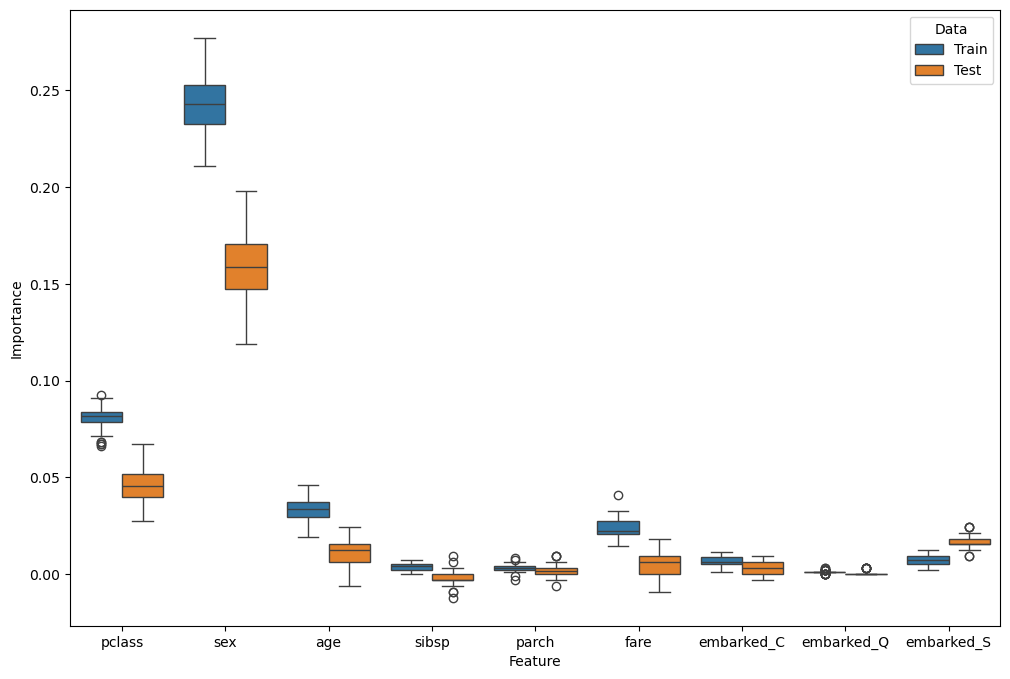

In [30]:
# Plot Results
hF, hA = plt.subplots(figsize = (12, 8))
sns.boxplot(data = dfFeatImpPerm, x = 'Feature', y = 'Importance', hue = 'Data', ax = hA)

plt.show()

* <font color='green'>(**@**)</font> Try extracting better results by using the dropped features.